## Эксперименты с препроцессингом видео и поиском камней

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMG_0573.MOV to IMG_0573.MOV


In [1]:
!pip install opencv-python
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.6/dist-packages (0.5.3)


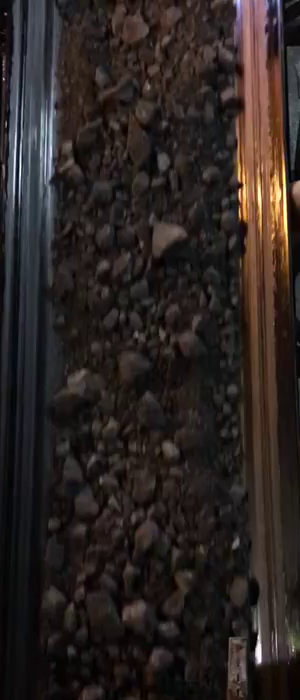

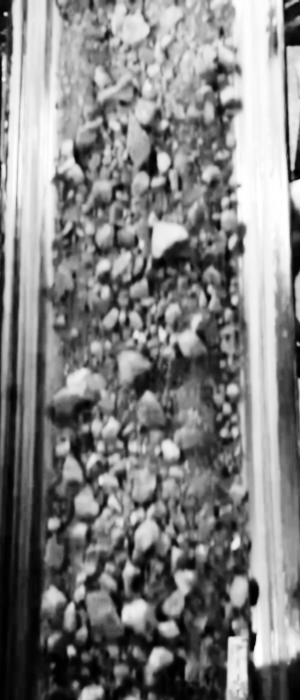

In [114]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('IMG_0573.MOV')
# while(cap.isOpened()):
ret, frame = cap.read()
#cv2_imshow(frame)
frame = cv2.GaussianBlur(frame,(5,5),0)
#cv2_imshow(frame)
frame = frame[0:700, 100:400]
cv2_imshow(cropped__img)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v = cv2.equalizeHist(v)
cv2_imshow(v)


In [0]:
kernel = np.ones((20,20),np.uint8)
s = cv2.morphologyEx(s, cv2.MORPH_CLOSE, kernel)

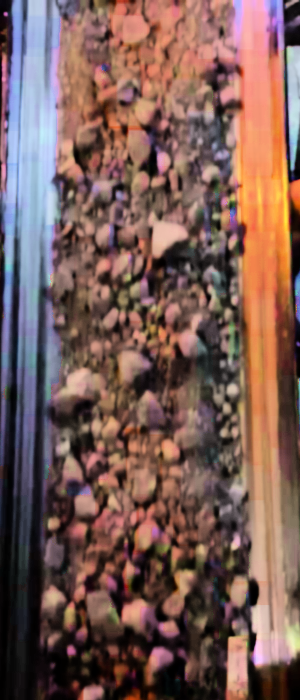

In [116]:
hsv_image = cv2.merge([h, s, v])
bgr = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
cv2_imshow(bgr)
#here thats we get after pre-processing of image.

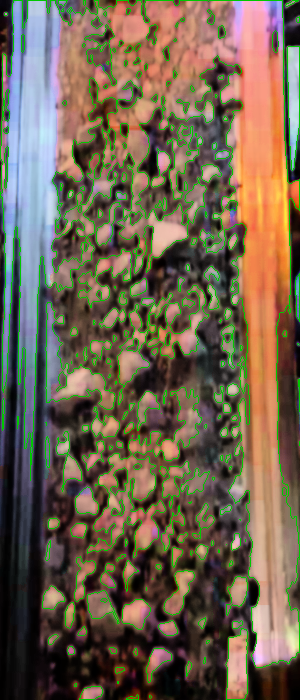

In [117]:
ret, thresh = cv2.threshold(v, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(bgr, contours, -1, (0,200,0), 1)
cv2_imshow(bgr)

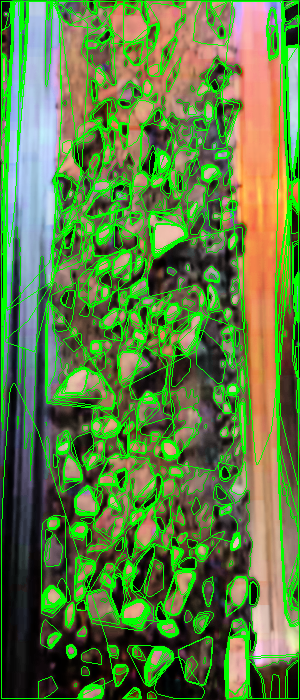

In [118]:
bgr2 = bgr.copy()
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(v)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(bgr2, hulls, 1, (0, 255, 0))
cv2_imshow(bgr2)

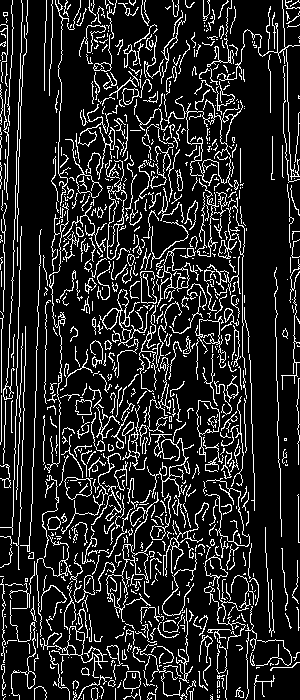

In [120]:
edges = cv2.Canny(hsv_image,100,200)
cv2_imshow(edges)

Видим, что всё-таки findContour работает тут лучше всего. Но возможно, ещё стоит поработать с обработкой изображения.

In [0]:
from imutils.video import VideoStream
import argparse
import imutils
import time
import cv2

In [0]:
OPENCV_OBJECT_TRACKERS = {
	"csrt": cv2.TrackerCSRT_create,
	"kcf": cv2.TrackerKCF_create,
	"boosting": cv2.TrackerBoosting_create,
	"mil": cv2.TrackerMIL_create,
	"tld": cv2.TrackerTLD_create,
	"medianflow": cv2.TrackerMedianFlow_create,
	"mosse": cv2.TrackerMOSSE_create
}
 
# initialize OpenCV's special multi-object tracker
trackers = cv2.MultiTracker_create()


In [0]:
def preprocessing(frame):
  frame = cv2.GaussianBlur(frame,(5,5),0)
  frame = frame[0:700, 100:400]
  cv2_imshow(cropped__img)
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv)
  v = cv2.equalizeHist(v)
  return frame

In [0]:
cap = cv2.VideoCapture('IMG_0573.MOV')
while True:
  ret, frame = cap.read()
  frame = preprocessing(frame)
  if frame is None:
		break